#**UNDERSTAND DATA**

#Content of the data:

Now that this year's IPL is over, let's not curb our cricket love and start analyzing the whole of IPL with this latest and complete Indian Premier League dataset. It contains the match descriptions, results, winners, player of the matches, ball by ball dataset and much more. So, stop thinking and start analyzing.

#Problem Statement:

We have a dataset with ball-by-ball details of IPL matches, including batting, bowling, runs, extras, and wickets. The goal is to analyze this data to understand team performance, evaluate players, and predict match results

#Target Variable:

**Total_runs** – Used to analyze team performance and predict scores.

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st

In [40]:
# Load the dataset
df = pd.read_csv("/content/deliveries.csv")
df

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN


In [41]:
# first 5 columns of the data
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [42]:
# last 5 columns of the data
df.tail()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260919,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,3,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN


In [43]:
# information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In this data there were 260920 raws and 17 columns

in this data columns extras_type,player_dismissed,dismissal_kind,fielder have null values.

In this data there were 8 int and 9 obj values

In [44]:
# column names of the data
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

#**DATA CLEANING**

In [45]:
# cheking null values in the data
df.isnull().sum()

,0
match_id,0
inning,0
batting_team,0
bowling_team,0
over,0
ball,0
batter,0
bowler,0
non_striker,0
batsman_runs,0


In this data extras_type have 246795,player_dismissed have 247970,dismissal_kind have 247970,fielder have 251566 null values

In [46]:
# drop the null values
df = df.drop(['extras_type','player_dismissed','dismissal_kind','fielder'], axis=1)

In [47]:
#checking all the null values have been filled
print(df.isnull().sum())

match_id        0
inning          0
batting_team    0
bowling_team    0
over            0
ball            0
batter          0
bowler          0
non_striker     0
batsman_runs    0
extra_runs      0
total_runs      0
is_wicket       0
dtype: int64


In [48]:
#checking duplicate values in the data
df.duplicated().sum()

np.int64(0)

In this data there were no duplicate values

In [49]:
# Summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   match_id      260920 non-null  int64 
 1   inning        260920 non-null  int64 
 2   batting_team  260920 non-null  object
 3   bowling_team  260920 non-null  object
 4   over          260920 non-null  int64 
 5   ball          260920 non-null  int64 
 6   batter        260920 non-null  object
 7   bowler        260920 non-null  object
 8   non_striker   260920 non-null  object
 9   batsman_runs  260920 non-null  int64 
 10  extra_runs    260920 non-null  int64 
 11  total_runs    260920 non-null  int64 
 12  is_wicket     260920 non-null  int64 
dtypes: int64(8), object(5)
memory usage: 25.9+ MB


In [50]:
# Descriptive statistics
df.describe()

,match_id,inning,over,ball,batsman_runs,extra_runs,total_runs,is_wicket
count,2.609200e+05,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000
mean,9.070665e+05,1.483531,9.197677,3.624486,1.265001,0.067806,1.332807,0.049632
std,3.679913e+05,0.502643,5.683484,1.814920,1.639298,0.343265,1.626416,0.217184
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5.483340e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,9.809670e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000
75%,1.254066e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000
max,1.426312e+06,6.000000,19.000000,11.000000,6.000000,7.000000,7.000000,1.000000


In this description we can see innings column we have taken there were some outliers in the data

In [51]:
# object
df.describe(include="object")

,batting_team,bowling_team,batter,bowler,non_striker
count,260920,260920,260920,260920,260920
unique,19,19,673,530,663
top,Mumbai Indians,Mumbai Indians,V Kohli,R Ashwin,V Kohli
freq,31437,31505,6236,4679,6067


In [52]:
#convert qualitative data into int
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# List of columns to encode
x = ["batting_team", "bowling_team", "batter", "bowler", "non_striker"]

# Apply LabelEncoder to each column
for column in x:
    df[column] = le.fit_transform(df[column])

In [53]:
#checking all the data converted to int
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,is_wicket
0,335982,1,8,16,0,1,537,335,103,0,1,1,0
1,335982,1,8,16,0,2,102,335,531,0,0,0,0
2,335982,1,8,16,0,3,102,335,531,0,1,1,0
3,335982,1,8,16,0,4,102,335,531,0,0,0,0
4,335982,1,8,16,0,5,102,335,531,0,0,0,0


#**Visualization**

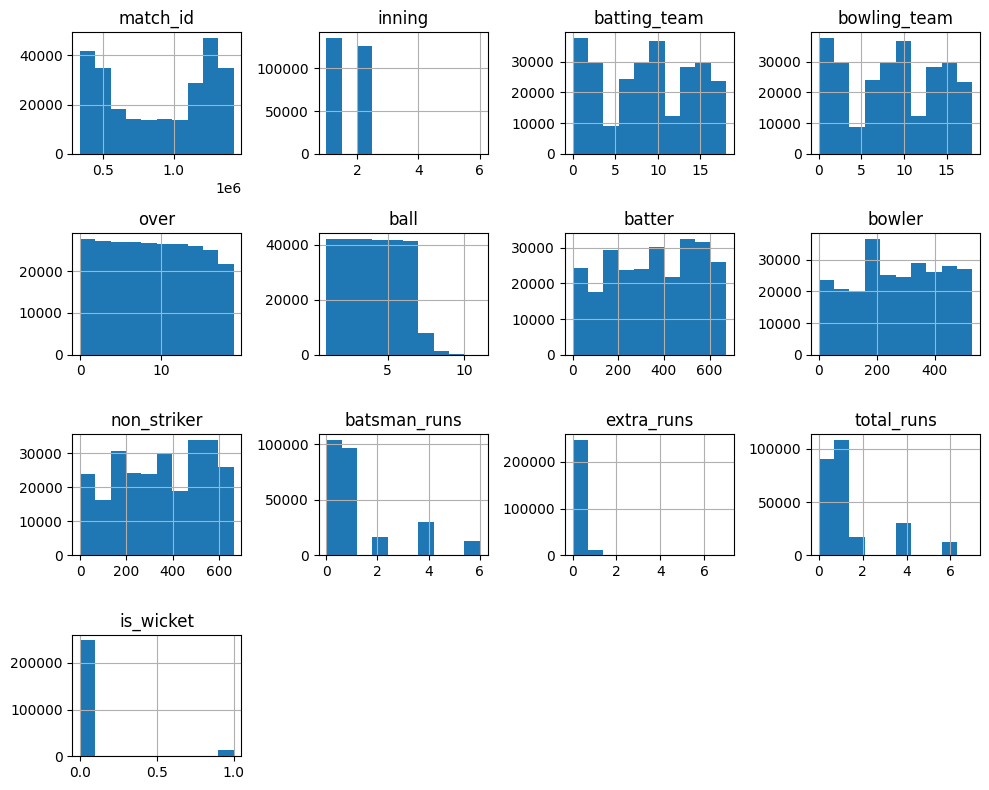

In [54]:
#histogram
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

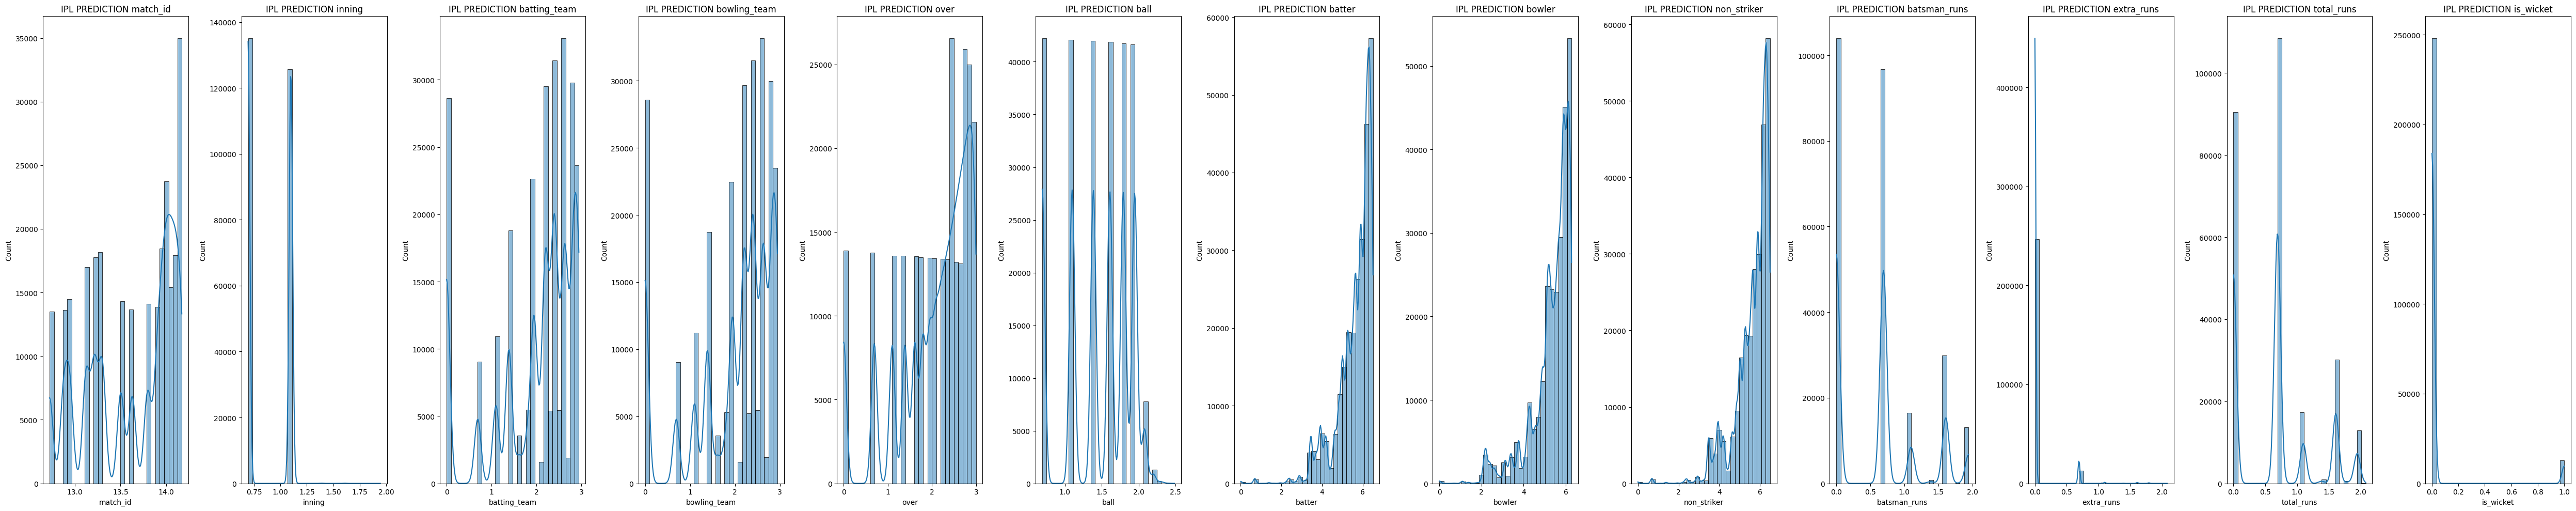

In [57]:
# Assuming df is a DataFrame with multiple features
num_features = df.shape[1]      # Number of features
plt.figure(figsize = (50, 10))  # Adjust the figure size as needed

for i, column in enumerate(df.columns, 1):
    plt.subplot(1, num_features, i)  # Adjust layout for each feature
    sns.histplot(df[column], bins = 30, kde = True)
    plt.title(f"IPL PREDICTION {column}")

plt.tight_layout()

plt.show()

In [60]:
#reduce skewness
import numpy as np
# List of columns to transform
columns_to_transform = ['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs',
       'total_runs', 'is_wicket']

# Apply log1p transformation
for column in columns_to_transform:
    df[column] = np.log1p(df[column])

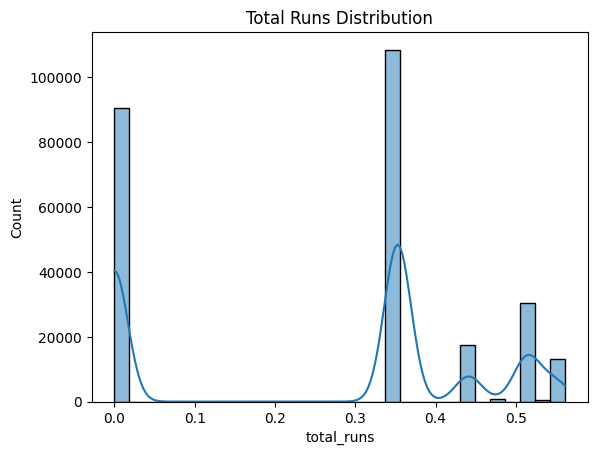

In [61]:
#histplot of total runs
sns.histplot(df['total_runs'], bins=30, kde=True)
plt.title("Total Runs Distribution")
plt.show()

 sets the plot's title to "Total Runs Distribution" and displays the plot.

#CORRELATION ANALYSIS

<Axes: >

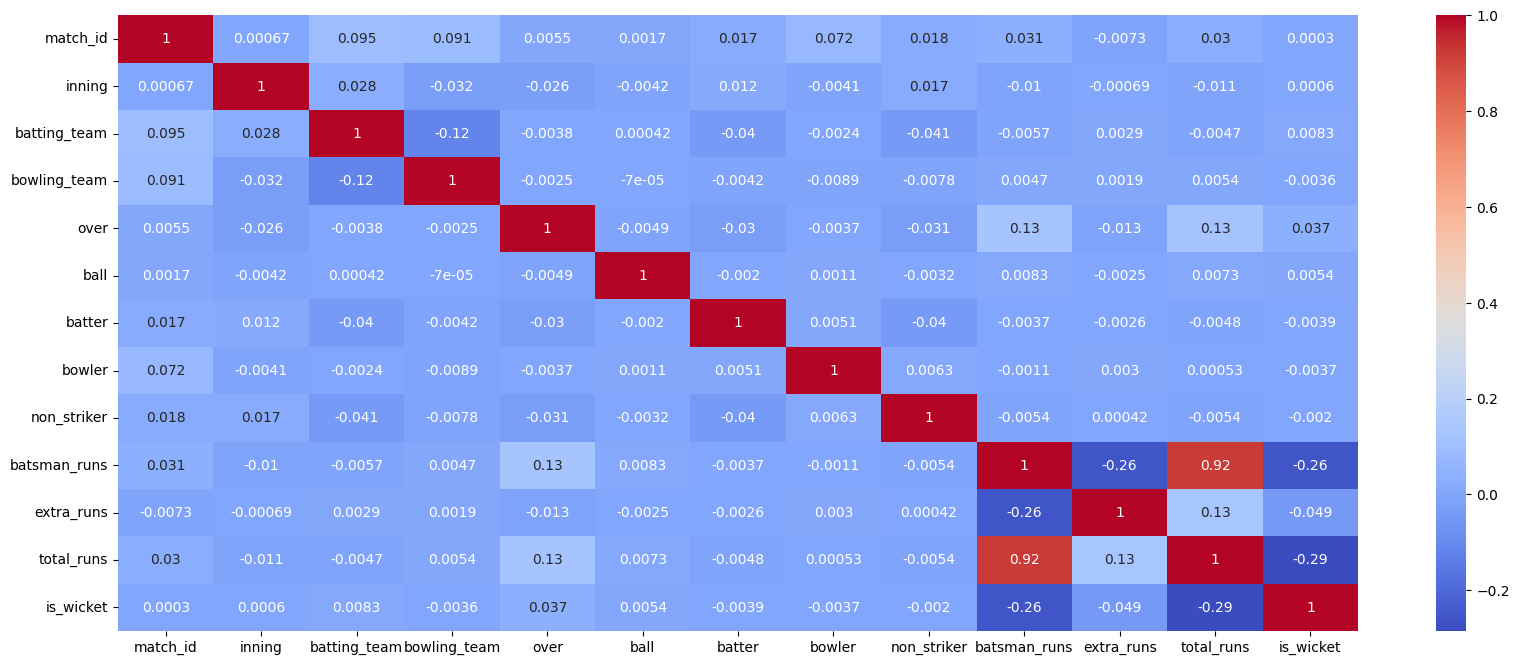

In [62]:
#Heatmap
x=df.corr()
plt.figure(figsize=(20, 8))
sns.heatmap(x, annot=True, cmap="coolwarm")


In [63]:
#reduce correlation
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
df = df.drop(columns=to_drop)


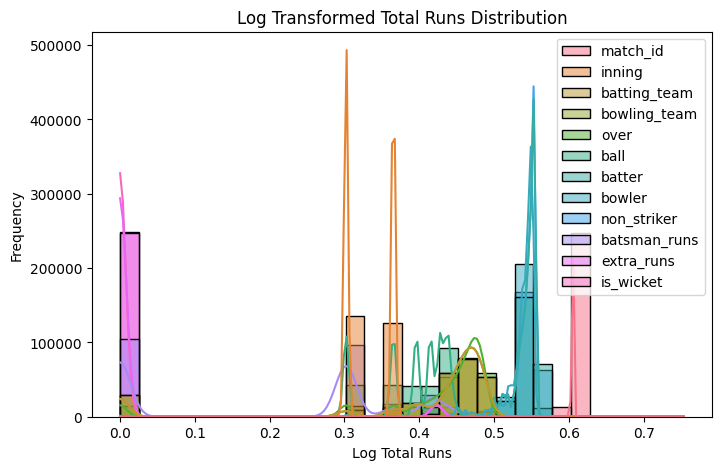

In [64]:
data = np.log(df + 1)  # Log transformation to reduce skewness

# Plotting the transformed data distribution
plt.figure(figsize=(8, 5))
sns.histplot(data, bins=30, kde=True)
plt.title("Log Transformed Total Runs Distribution")
plt.xlabel("Log Total Runs")
plt.ylabel("Frequency")
plt.show()

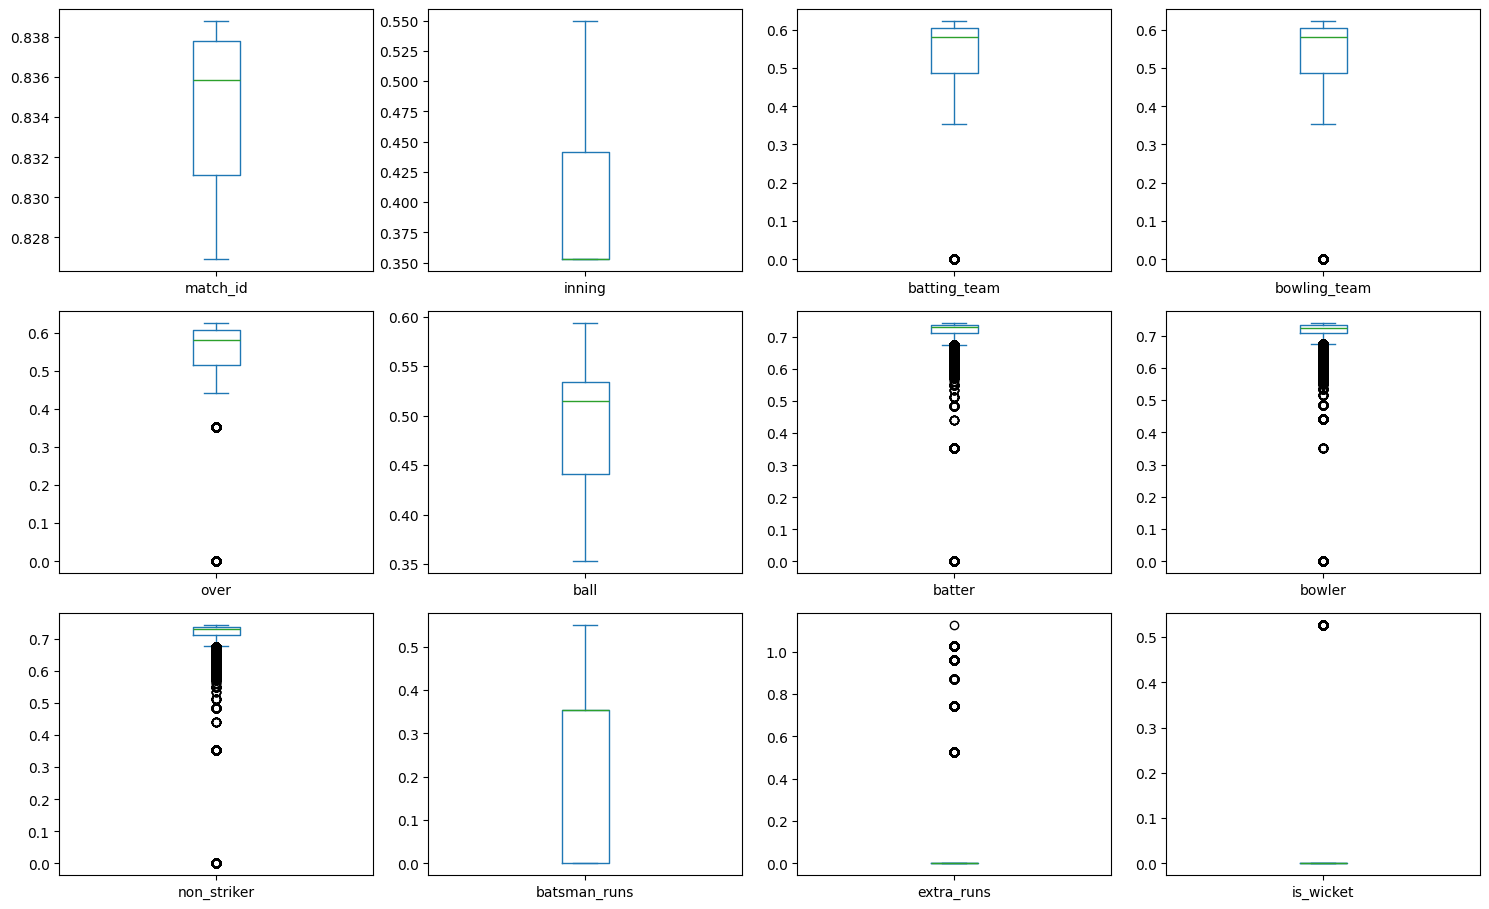

In [65]:
#Outlier
df.plot(kind='box', subplots=True, layout=(5, 4), figsize=(15, 15))
plt.tight_layout()
plt.show()

In [66]:
#removing outliers
import numpy as np
x=["inning","ball",'batsman_runs', 'extra_runs','is_wicket']
for i in x:
    data=df[i]
    q1=np.quantile(data,0.25)
    q2=np.quantile(data,0.50)
    q3=np.quantile(data,0.75)
    iqr=q3-q1
    lower=q1-(1.5*iqr)
    upper=q3+(1.5*iqr)
    outliers=[j for j in data if j<lower or j>upper]
    print(len(outliers))
    df= df[(df[i] >= lower) & (df[i] <= upper)]

0
0
0
14125
12887


#**Feature Engineering**

In [67]:
# Aggregate total runs per match
match_runs = df.groupby("match_id")["batsman_runs"].sum().reset_index()
match_runs.rename(columns={"batsman_runs": "match_total_runs"}, inplace=True)


In [68]:
# Merge with the original dataframe
df = df.merge(match_runs, on="match_id", how="left")

# Display updated dataframe
df.head()


,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,is_wicket,match_total_runs
0,0.826915,0.352793,0.571637,0.616122,0.000000,0.441230,0.695104,0.728220,0.738832,0.0,0.0,0.0,47.709805
1,0.826915,0.352793,0.571637,0.616122,0.000000,0.514321,0.695104,0.728220,0.738832,0.0,0.0,0.0,47.709805
2,0.826915,0.352793,0.571637,0.616122,0.000000,0.534383,0.695104,0.728220,0.738832,0.0,0.0,0.0,47.709805
3,0.826915,0.352793,0.571637,0.616122,0.000000,0.549605,0.695104,0.728220,0.738832,0.0,0.0,0.0,47.709805
4,0.826915,0.352793,0.571637,0.616122,0.352793,0.352793,0.695104,0.738749,0.738832,0.0,0.0,0.0,47.709805


In [69]:
#train test split
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
df["run_rate"] = df["match_total_runs"] / df["over"].replace(0, 1)
features = ["inning", "over", "ball", "batsman_runs", "extra_runs", "run_rate"]
X = df[features]
y = df["match_total_runs"]


# Random Forest

In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Standardize the features (important for SVR)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [71]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [72]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred = rf_model.predict(X_test)

# Evaluation
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Predicted Score:", y_pred.mean())
print("Accuracy:", r2_score(y_test, y_pred))

Mean Squared Error: 5.975960986693929e-05
R² Score: 0.9999990798920573
Mean Predicted Score: 59.06427940251859
Accuracy: 0.9999990798920573


#Decision Tree


In [82]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create and train the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
# Predict
y_pred = dt_model.predict(X_test)

In [77]:
# Evaluation
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Predicted Score:", y_pred.mean())
print("Accuracy:", r2_score(y_test, y_pred))

Mean Squared Error: 2.8139297129177446e-05
R² Score: 0.9999995667443137
Mean Predicted Score: 59.06427084883114
Accuracy: 0.9999995667443137


#Linear Regression

In [83]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
# Create a pipeline: Polynomial features + Linear Regression
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)

# Predict
y_pred = poly_model.predict(X_test)

In [84]:
# Evaluation
print("Polynomial Linear Regression (Degree=2)")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Predicted Score:", y_pred.mean())
print("Accuracy:", r2_score(y_test, y_pred))

Polynomial Linear Regression (Degree=2)
Mean Squared Error: 3.7958164798146137
R² Score: 0.941556497776758
Mean Predicted Score: 59.05374100567173
Accuracy: 0.941556497776758
